## Problem Description

Detecting fraud for transactions in a payment gateway
A new disruptive payment gateway start-up, ‘IndAvenue’, has started gaining traction
due to its extremely low processing fees for handling online vendors’ digital payments.
This strategy has led to very low costs of acquiring new vendors.
Unfortunately, due to the cheap processing fees, the company was not able to build and deploy a robust
and fast fraud detection system.Consequently, a lot of the vendorshave accumulated significant
economic burden due to handling   fraudulent transactions on theirplatforms. 

This has resulted in a significant number of current clients leaving IndAvenue’s payment gateway platform
for more expensive yet reliable payment gateway companies.

The company’s data engineers curated a dataset that they believe follows the real
world distribution of transactions on their payment gateway. The company hired Insofe and provided 
it with the dataset, to create a fast and robust AI based model that
can detect and prevent fraudulent transactions on its payment gateway.

They have provided you with the dataset that has the `is_fraud` column, which  
encodes the information whether a transaction was fraudulent or not.

In this hackathon, you will now have to use this curated data to create a machine
learning model that will be able to predict the `is_fraud` column

In [63]:
##Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix,classification_report

from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

In [2]:
#importing training data
data = pd.read_csv("train_data.csv")

In [3]:
#cheking first 5 rows
data.head()

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,transaction_initiation,partner_pricing_category,is_fraud
0,144703125000,17539344,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-5.0,2016-11-15 19:16:12+00:00,2,0
1,77406814453032,24710841,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,100.0,2017-01-11 09:25:33+00:00,2,0
2,308929485482801,24265476,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,50.0,2016-12-07 07:58:09+00:00,2,0
3,665270027747073,10240000,other_debit_cards,102557,cat_3,IND_INR,other_pcs,1000.0,2017-01-11 16:15:44+00:00,2,0
4,38276160171101,5880625,other_debit_cards,118335,cat_1,IND_INR,other_pcs,200.0,2016-11-16 17:04:42+00:00,2,0


In [4]:
#checking na values
data.isna().sum()

transaction_number          0
user_id                     0
payment_method              0
partner_id                  0
partner_category            0
country                     0
device_type                 0
money_transacted            0
transaction_initiation      0
partner_pricing_category    0
is_fraud                    0
dtype: int64

In [5]:
#checking info of the features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76529 entries, 0 to 76528
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   transaction_number        76529 non-null  int64  
 1   user_id                   76529 non-null  int64  
 2   payment_method            76529 non-null  object 
 3   partner_id                76529 non-null  int64  
 4   partner_category          76529 non-null  object 
 5   country                   76529 non-null  object 
 6   device_type               76529 non-null  object 
 7   money_transacted          76529 non-null  float64
 8   transaction_initiation    76529 non-null  object 
 9   partner_pricing_category  76529 non-null  int64  
 10  is_fraud                  76529 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 6.4+ MB


In [6]:
#checking shape of the dataset
data.shape

(76529, 11)

In [7]:
#checking descriptive stats
data.describe(include="all")

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,transaction_initiation,partner_pricing_category,is_fraud
count,7.652900e+04,7.652900e+04,76529,76529.000000,76529,76529,76529,76529.000000,76529,76529.000000,76529.000000
unique,NaN,NaN,6,NaN,9,1,4,NaN,75811,NaN,NaN
top,NaN,NaN,sbi_atm_cum_debit_card,NaN,cat_1,IND_INR,other_pcs,NaN,2016-12-24 16:30:13+00:00,NaN,NaN
freq,NaN,NaN,30538,NaN,36306,76529,45560,NaN,12,NaN,NaN
mean,6.940200e+14,1.247483e+07,NaN,58497.189105,NaN,NaN,NaN,132.724348,NaN,2.255707,0.002012
std,7.867885e+14,1.205878e+07,NaN,36740.216787,NaN,NaN,NaN,2350.110900,NaN,0.732174,0.044814
min,8.000000e+00,1.000000e+00,NaN,7889.000000,NaN,NaN,NaN,-20000.000000,NaN,0.000000,0.000000
25%,4.387866e+13,3.515625e+06,NaN,23667.000000,NaN,NaN,NaN,-1.000000,NaN,2.000000,0.000000
50%,3.452540e+14,9.753129e+06,NaN,47334.000000,NaN,NaN,NaN,20.000000,NaN,2.000000,0.000000
75%,1.173440e+15,1.788444e+07,NaN,78890.000000,NaN,NaN,NaN,52.000000,NaN,2.000000,0.000000


## Analysis on Transaction number and UserID

In [8]:
#Number of unique  Transaction number
print("The number of unique Transaction number in the  data set")
print(data['transaction_number'].nunique())

#Number of unique user_id :
print("The number of unique user_id in the  data set")
print(data['user_id'].nunique())

The number of unique Transaction number in the  data set
76529
The number of unique user_id in the  data set
3594


# Dropping Zero Variance features like Transaction number 

In [9]:
##data = data.drop(['transaction_number'], axis=1)

In [10]:
## find unique values in each column 
for col in data.columns:
    print("column name and its unique value",col,":",len(data[col].unique()))

column name and its unique value transaction_number : 76529
column name and its unique value user_id : 3594
column name and its unique value payment_method : 6
column name and its unique value partner_id : 23
column name and its unique value partner_category : 9
column name and its unique value country : 1
column name and its unique value device_type : 4
column name and its unique value money_transacted : 1454
column name and its unique value transaction_initiation : 75811
column name and its unique value partner_pricing_category : 4
column name and its unique value is_fraud : 2


In [11]:
print("Unique Values in `payment_method ` => {}".format(data.payment_method .unique()))
print("Unique Values in `partner_id ` => {}".format(data.partner_id.unique()))
print("Unique Values in `partner_category ` => {}".format(data.partner_category .unique()))
print("Unique Values in `device_type ` => {}".format(data.device_type .unique()))
print("Unique Values in `partner_pricing_category ` => {}".format(data.partner_pricing_category .unique()))
print("Unique Values in `is_fraud ` => {}".format(data.	is_fraud .unique()))

Unique Values in `payment_method ` => ['sbi_atm_cum_debit_card' 'e_wallet_payments' 'other_debit_cards'
 'visa_master_debit_cards' 'visa_master_credit_cards'
 'unified_payments_interface']
Unique Values in `partner_id ` => [ 47334  78890 102557 118335  23667   7889  31556  86779 149891 165669
 110446 189336  55223  63112  15778 157780 213003 173558  39445 126224
  71001  94668 181447]
Unique Values in `partner_category ` => ['cat_1' 'cat_2' 'cat_3' 'cat_4' 'cat_5' 'cat_6' 'cat_7' 'cat_8' 'cat_9']
Unique Values in `device_type ` => ['android_devices' 'other_pcs' 'windows_pcs' 'ios_devices']
Unique Values in `partner_pricing_category ` => [2 4 1 0]
Unique Values in `is_fraud ` => [0 1]


## Feature Engineering


## Generating new features from transaction_initiation

In [12]:
data["transaction_year"]=data["transaction_initiation"].apply(lambda x:np.int(x[0:4]))
data["transaction_month"]=data["transaction_initiation"].apply(lambda x:np.int(x[5:7]))
data["transaction_day"]=data["transaction_initiation"].apply(lambda x:np.int(x[8:10]))
data["transaction_time"]=data["transaction_initiation"].apply(lambda x:(x[11:19]))

In [13]:
# dropping the transaction_initiation column
data = data.drop(['transaction_initiation'], axis=1)

In [14]:
data.head()

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,partner_pricing_category,is_fraud,transaction_year,transaction_month,transaction_day,transaction_time
0,144703125000,17539344,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-5.0,2,0,2016,11,15,19:16:12
1,77406814453032,24710841,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,100.0,2,0,2017,1,11,09:25:33
2,308929485482801,24265476,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,50.0,2,0,2016,12,7,07:58:09
3,665270027747073,10240000,other_debit_cards,102557,cat_3,IND_INR,other_pcs,1000.0,2,0,2017,1,11,16:15:44
4,38276160171101,5880625,other_debit_cards,118335,cat_1,IND_INR,other_pcs,200.0,2,0,2016,11,16,17:04:42


# pivot table w.r.t payment method, money transaction & is_fraud

In [15]:
#Pivot table
paysim_pivot1=pd.pivot_table(data,index=["payment_method"],
                               values=['money_transacted','is_fraud'],
                               aggfunc=[np.sum,np.std], margins=True)

#Adding color gradient 
cm = sns.light_palette("green", as_cmap=True)
paysim_pivot1.style.background_gradient(cmap=cm)

In [16]:
#checking target frequency(distribution)
data['is_fraud'].value_counts()

0    76375
1      154
Name: is_fraud, dtype: int64

In [17]:
# Create two dataframes with fraud and non-fraud data 
pd.concat([data[data['is_fraud']==1].groupby('payment_method')['money_transacted'].mean(),\
           data[data['is_fraud']==0].groupby('payment_method')['money_transacted'].mean(),\
           data.groupby('payment_method')['is_fraud'].mean()*100],keys=["Fraudulent","Non-Fraudulent","Percent(%)"],axis=1,\
          sort=False).sort_values(by=['Non-Fraudulent'])

,Fraudulent,Non-Fraudulent,Percent(%)
payment_method,,,
sbi_atm_cum_debit_card,-9604.020000,-76.264637,0.016373
unified_payments_interface,NaN,29.200000,0.000000
e_wallet_payments,11000.000000,73.685087,0.007304
visa_master_debit_cards,32708.822353,256.040267,0.438031
other_debit_cards,47146.919070,379.458711,0.956618
visa_master_credit_cards,17890.063396,496.783449,2.159739


In [18]:
#checking payment_method and is fraud
data[(data['payment_method']=='unified_payments_interface') & (data['is_fraud']==0)]

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,partner_pricing_category,is_fraud,transaction_year,transaction_month,transaction_day,transaction_time
4212,1310380107360589,7929856,unified_payments_interface,78890,cat_2,IND_INR,other_pcs,20.0,2,0,2016,12,12,08:48:46
5607,347844227927552,24206400,unified_payments_interface,78890,cat_2,IND_INR,other_pcs,100.0,2,0,2016,11,16,13:25:25
9584,545398589215927,5180176,unified_payments_interface,78890,cat_2,IND_INR,other_pcs,16.0,2,0,2017,1,17,04:31:41
9931,29529416379429,7929856,unified_payments_interface,165669,cat_3,IND_INR,other_pcs,30.0,2,0,2016,12,29,07:44:43
10650,628453817980416,7929856,unified_payments_interface,15778,cat_4,IND_INR,other_pcs,20.0,2,0,2017,2,10,15:45:01
25831,8654267381291,5707321,unified_payments_interface,78890,cat_2,IND_INR,other_pcs,20.0,2,0,2016,12,22,19:48:59
31140,81374125983704,7929856,unified_payments_interface,86779,cat_4,IND_INR,other_pcs,20.0,2,0,2016,12,6,16:44:51
36804,360883298137536,5180176,unified_payments_interface,23667,cat_2,IND_INR,other_pcs,10.0,2,0,2017,2,6,20:32:30
37027,12647708399899,7929856,unified_payments_interface,15778,cat_4,IND_INR,other_pcs,20.0,2,0,2017,1,16,15:48:12
43407,7785938168000,11594025,unified_payments_interface,23667,cat_2,IND_INR,other_pcs,20.0,2,0,2016,11,26,19:35:35


In [19]:
data[(data['payment_method']=='e_wallet_payments') & (data['is_fraud']==0)]

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,partner_pricing_category,is_fraud,transaction_year,transaction_month,transaction_day,transaction_time
1,77406814453032,24710841,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,100.0,2,0,2017,1,11,09:25:33
2,308929485482801,24265476,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,50.0,2,0,2016,12,7,07:58:09
7,2180210550765632,10400625,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,104.0,2,0,2016,11,16,10:17:03
9,13217911873984,13235044,e_wallet_payments,23667,cat_2,IND_INR,other_pcs,10.0,2,0,2016,12,18,13:51:14
10,380353222632664,3876961,e_wallet_payments,23667,cat_2,IND_INR,other_pcs,20.0,2,0,2016,12,9,14:36:32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76516,15798135578688,7706176,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,60.0,2,0,2016,12,19,08:19:04
76517,1853388186532875,13205956,e_wallet_payments,23667,cat_2,IND_INR,other_pcs,10.0,2,0,2016,12,23,08:12:38
76518,119378927438919,17239104,e_wallet_payments,110446,cat_1,IND_INR,other_pcs,21.5,2,0,2017,1,25,03:51:26
76519,2351098392534611,2920681,e_wallet_payments,23667,cat_2,IND_INR,other_pcs,40.0,2,0,2017,1,6,16:43:02


In [20]:
data[(data['payment_method']=='sbi_atm_cum_debit_card') & (data['is_fraud']==1)]

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,partner_pricing_category,is_fraud,transaction_year,transaction_month,transaction_day,transaction_time
47341,184744999738664,53860921,sbi_atm_cum_debit_card,23667,cat_2,IND_INR,android_devices,-18000.0,4,1,2017,1,10,15:48:59
60709,401898256032573,53860921,sbi_atm_cum_debit_card,78890,cat_2,IND_INR,android_devices,-10000.0,4,1,2017,1,10,16:03:35
63845,368987514203125,748225,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-20.1,2,1,2017,1,23,09:15:37
66890,674110888578568,54774801,sbi_atm_cum_debit_card,23667,cat_2,IND_INR,android_devices,-10000.0,4,1,2017,1,10,21:27:12
68994,2015655699968000,55190041,sbi_atm_cum_debit_card,23667,cat_2,IND_INR,android_devices,-10000.0,0,1,2017,1,15,11:09:57


## checking the frauds w.r.t diff payment methods

In [21]:
data[data.payment_method=="visa_master_debit_cards"].is_fraud.value_counts()

0    11592
1       51
Name: is_fraud, dtype: int64

In [22]:
data[data.payment_method=="visa_master_credit_cards"].is_fraud.value_counts()


0    2401
1      53
Name: is_fraud, dtype: int64

In [23]:
data[data.payment_method=="sbi_atm_cum_debit_card"].is_fraud.value_counts()

0    30533
1        5
Name: is_fraud, dtype: int64

In [24]:
data[data.payment_method=="unified_payments_interface"].is_fraud.value_counts()

0    15
Name: is_fraud, dtype: int64

In [25]:
data[data.payment_method=="e_wallet_payments"].is_fraud.value_counts()

0    27382
1        2
Name: is_fraud, dtype: int64

In [26]:
data[data.payment_method=="other_debit_cards"].is_fraud.value_counts()

0    4452
1      43
Name: is_fraud, dtype: int64

## Dropping the data in which payment method is sbi_atm_cum_debit_card,unified_payments_interface and e_wallet_payments

In [27]:
data_with_index = data.set_index("payment_method")
data_with_index.head()

,transaction_number,user_id,partner_id,partner_category,country,device_type,money_transacted,partner_pricing_category,is_fraud,transaction_year,transaction_month,transaction_day,transaction_time
payment_method,,,,,,,,,,,,,
sbi_atm_cum_debit_card,144703125000,17539344,47334,cat_1,IND_INR,android_devices,-5.0,2,0,2016,11,15,19:16:12
e_wallet_payments,77406814453032,24710841,78890,cat_2,IND_INR,other_pcs,100.0,2,0,2017,1,11,09:25:33
e_wallet_payments,308929485482801,24265476,78890,cat_2,IND_INR,other_pcs,50.0,2,0,2016,12,7,07:58:09
other_debit_cards,665270027747073,10240000,102557,cat_3,IND_INR,other_pcs,1000.0,2,0,2017,1,11,16:15:44
other_debit_cards,38276160171101,5880625,118335,cat_1,IND_INR,other_pcs,200.0,2,0,2016,11,16,17:04:42


In [28]:
#dropped few payment method and assigned to new dataset
data_with_index = data_with_index.drop(["sbi_atm_cum_debit_card", "unified_payments_interface", "e_wallet_payments"])

In [29]:
data_with_index.head()

,transaction_number,user_id,partner_id,partner_category,country,device_type,money_transacted,partner_pricing_category,is_fraud,transaction_year,transaction_month,transaction_day,transaction_time
payment_method,,,,,,,,,,,,,
other_debit_cards,665270027747073,10240000,102557,cat_3,IND_INR,other_pcs,1000.0,2,0,2017,1,11,16:15:44
other_debit_cards,38276160171101,5880625,118335,cat_1,IND_INR,other_pcs,200.0,2,0,2016,11,16,17:04:42
visa_master_debit_cards,2140454669921875,7344100,23667,cat_2,IND_INR,other_pcs,20.0,4,0,2017,1,22,04:12:16
visa_master_debit_cards,47124116928,7963684,7889,cat_2,IND_INR,other_pcs,600.0,4,0,2017,1,27,10:03:08
other_debit_cards,912757683619027,23174596,78890,cat_2,IND_INR,other_pcs,40.0,4,0,2017,1,4,09:41:14


In [30]:
data_with_index.is_fraud.value_counts()

0    18445
1      147
Name: is_fraud, dtype: int64

In [31]:
#reseting the index
data_with_index.reset_index(inplace = True)

In [32]:
data_with_index

,payment_method,transaction_number,user_id,partner_id,partner_category,country,device_type,money_transacted,partner_pricing_category,is_fraud,transaction_year,transaction_month,transaction_day,transaction_time
0,other_debit_cards,665270027747073,10240000,102557,cat_3,IND_INR,other_pcs,1000.0,2,0,2017,1,11,16:15:44
1,other_debit_cards,38276160171101,5880625,118335,cat_1,IND_INR,other_pcs,200.0,2,0,2016,11,16,17:04:42
2,visa_master_debit_cards,2140454669921875,7344100,23667,cat_2,IND_INR,other_pcs,20.0,4,0,2017,1,22,04:12:16
3,visa_master_debit_cards,47124116928,7963684,7889,cat_2,IND_INR,other_pcs,600.0,4,0,2017,1,27,10:03:08
4,other_debit_cards,912757683619027,23174596,78890,cat_2,IND_INR,other_pcs,40.0,4,0,2017,1,4,09:41:14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18587,visa_master_debit_cards,2660023139894693,18809569,23667,cat_2,IND_INR,other_pcs,100.0,4,0,2017,1,25,20:29:43
18588,visa_master_debit_cards,2104188591340207,7344100,165669,cat_3,IND_INR,other_pcs,400.0,2,0,2016,11,30,05:15:14
18589,other_debit_cards,78948067898699,2449225,118335,cat_1,IND_INR,other_pcs,300.0,2,0,2016,12,8,06:47:02
18590,other_debit_cards,36597674819601,19501056,78890,cat_2,IND_INR,other_pcs,20.0,4,0,2016,11,20,13:03:50


In [33]:
#Create two dataframes with fraud and non-fraud data w.r.t device type
pd.concat([data_with_index[data_with_index['is_fraud']==1].groupby('device_type')['money_transacted'].mean(),\
           data_with_index[data_with_index['is_fraud']==0].groupby('device_type')['money_transacted'].mean(),\
           data_with_index.groupby('device_type')['is_fraud'].mean()*100],keys=["Fraudulent","Non-Fraudulent","Percent(%)"],axis=1,\
          sort=False).sort_values(by=['Non-Fraudulent'])

,Fraudulent,Non-Fraudulent,Percent(%)
device_type,,,
other_pcs,32080.005734,309.864907,0.775867
windows_pcs,14050.000000,1167.749045,2.484472


In [34]:
##Create two dataframes with fraud and non-fraud data w.r.t partner category
pd.concat([data_with_index[data_with_index['is_fraud']==1].groupby('partner_category')['money_transacted'].mean(),\
           data_with_index[data_with_index['is_fraud']==0].groupby('partner_category')['money_transacted'].mean(),\
           data_with_index.groupby('partner_category')['is_fraud'].mean()*100],keys=["Fraudulent","Non-Fraudulent","Percent(%)"],axis=1,\
          sort=False).sort_values(by=['Non-Fraudulent'])

,Fraudulent,Non-Fraudulent,Percent(%)
partner_category,,,
cat_9,NaN,10.000000,0.000000
cat_2,8444.444444,124.497559,0.120692
cat_4,NaN,137.431973,0.000000
cat_6,NaN,179.540230,0.000000
cat_3,10843.326667,352.736842,1.554404
cat_1,34853.943937,433.432070,1.298436
cat_5,NaN,799.688716,0.000000
cat_8,21800.000000,1985.333333,11.764706
cat_7,NaN,2085.847458,0.000000


In [35]:
data_with_index_v1 = data_with_index.set_index("partner_category")
data_with_index_v1.head()

,payment_method,transaction_number,user_id,partner_id,country,device_type,money_transacted,partner_pricing_category,is_fraud,transaction_year,transaction_month,transaction_day,transaction_time
partner_category,,,,,,,,,,,,,
cat_3,other_debit_cards,665270027747073,10240000,102557,IND_INR,other_pcs,1000.0,2,0,2017,1,11,16:15:44
cat_1,other_debit_cards,38276160171101,5880625,118335,IND_INR,other_pcs,200.0,2,0,2016,11,16,17:04:42
cat_2,visa_master_debit_cards,2140454669921875,7344100,23667,IND_INR,other_pcs,20.0,4,0,2017,1,22,04:12:16
cat_2,visa_master_debit_cards,47124116928,7963684,7889,IND_INR,other_pcs,600.0,4,0,2017,1,27,10:03:08
cat_2,other_debit_cards,912757683619027,23174596,78890,IND_INR,other_pcs,40.0,4,0,2017,1,4,09:41:14


In [36]:
data_with_index_v1 = data_with_index_v1.drop(['cat_9','cat_4','cat_5','cat_6','cat_7'])

In [37]:
data_with_index_v1.reset_index(inplace = True)

In [38]:
data_with_index_v1

,partner_category,payment_method,transaction_number,user_id,partner_id,country,device_type,money_transacted,partner_pricing_category,is_fraud,transaction_year,transaction_month,transaction_day,transaction_time
0,cat_3,other_debit_cards,665270027747073,10240000,102557,IND_INR,other_pcs,1000.0,2,0,2017,1,11,16:15:44
1,cat_1,other_debit_cards,38276160171101,5880625,118335,IND_INR,other_pcs,200.0,2,0,2016,11,16,17:04:42
2,cat_2,visa_master_debit_cards,2140454669921875,7344100,23667,IND_INR,other_pcs,20.0,4,0,2017,1,22,04:12:16
3,cat_2,visa_master_debit_cards,47124116928,7963684,7889,IND_INR,other_pcs,600.0,4,0,2017,1,27,10:03:08
4,cat_2,other_debit_cards,912757683619027,23174596,78890,IND_INR,other_pcs,40.0,4,0,2017,1,4,09:41:14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17829,cat_2,visa_master_debit_cards,2660023139894693,18809569,23667,IND_INR,other_pcs,100.0,4,0,2017,1,25,20:29:43
17830,cat_3,visa_master_debit_cards,2104188591340207,7344100,165669,IND_INR,other_pcs,400.0,2,0,2016,11,30,05:15:14
17831,cat_1,other_debit_cards,78948067898699,2449225,118335,IND_INR,other_pcs,300.0,2,0,2016,12,8,06:47:02
17832,cat_2,other_debit_cards,36597674819601,19501056,78890,IND_INR,other_pcs,20.0,4,0,2016,11,20,13:03:50


In [39]:
# Use `LabelEncoder` to encode labels with value between 0 and n_classes-1.
#partner_category
le = LabelEncoder()
data_with_index_v1['partner_category'] = le.fit_transform(data_with_index_v1['partner_category'])
#device_type
le = LabelEncoder()
data_with_index_v1['device_type'] = le.fit_transform(data_with_index_v1['device_type'])
#partner_pricing_category
le = LabelEncoder()
data_with_index_v1['partner_pricing_category'] = le.fit_transform(data_with_index_v1['partner_pricing_category'])
#payment_method
le = LabelEncoder()
data_with_index_v1['payment_method'] = le.fit_transform(data_with_index_v1['payment_method'])
#transaction_year
le = LabelEncoder()
data_with_index_v1['transaction_year'] = le.fit_transform(data_with_index_v1['transaction_year'])

In [40]:
data_with_index_v1.head()

,partner_category,payment_method,transaction_number,user_id,partner_id,country,device_type,money_transacted,partner_pricing_category,is_fraud,transaction_year,transaction_month,transaction_day,transaction_time
0,2,0,665270027747073,10240000,102557,IND_INR,0,1000.0,2,0,1,1,11,16:15:44
1,0,0,38276160171101,5880625,118335,IND_INR,0,200.0,2,0,0,11,16,17:04:42
2,1,2,2140454669921875,7344100,23667,IND_INR,0,20.0,3,0,1,1,22,04:12:16
3,1,2,47124116928,7963684,7889,IND_INR,0,600.0,3,0,1,1,27,10:03:08
4,1,0,912757683619027,23174596,78890,IND_INR,0,40.0,3,0,1,1,4,09:41:14


In [41]:
data_with_index_v1 = data_with_index_v1.drop(['country'], axis=1)

In [42]:
#independent and Dependent features
X =data_with_index_v1.drop(['is_fraud'], axis = 1)
y =data_with_index_v1['is_fraud']


In [43]:
#checkinh the datatypes of the features
data_with_index_v1.dtypes

partner_category              int64
payment_method                int64
transaction_number            int64
user_id                       int64
partner_id                    int64
device_type                   int64
money_transacted            float64
partner_pricing_category      int64
is_fraud                      int64
transaction_year              int64
transaction_month             int64
transaction_day               int64
transaction_time             object
dtype: object

In [44]:
# Converting Total time into seconds
def get_sec(time_str):
    """Get Seconds from time."""
    h, m, s = time_str.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

In [45]:
#Applying get seconds gunction transaction time
data_with_index_v1["transaction_time"]=data_with_index_v1["transaction_time"].apply(lambda x:get_sec(x))

In [46]:
data_with_index_v1

,partner_category,payment_method,transaction_number,user_id,partner_id,device_type,money_transacted,partner_pricing_category,is_fraud,transaction_year,transaction_month,transaction_day,transaction_time
0,2,0,665270027747073,10240000,102557,0,1000.0,2,0,1,1,11,58544
1,0,0,38276160171101,5880625,118335,0,200.0,2,0,0,11,16,61482
2,1,2,2140454669921875,7344100,23667,0,20.0,3,0,1,1,22,15136
3,1,2,47124116928,7963684,7889,0,600.0,3,0,1,1,27,36188
4,1,0,912757683619027,23174596,78890,0,40.0,3,0,1,1,4,34874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17829,1,2,2660023139894693,18809569,23667,0,100.0,3,0,1,1,25,73783
17830,2,2,2104188591340207,7344100,165669,0,400.0,2,0,0,11,30,18914
17831,0,0,78948067898699,2449225,118335,0,300.0,2,0,0,12,8,24422
17832,1,0,36597674819601,19501056,78890,0,20.0,3,0,0,11,20,47030


In [55]:
##Features Importances
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [56]:
print(model.feature_importances_)

[0.0104331  0.0376704  0.05596582 0.06019142 0.0110781  0.00308858
 0.63831973 0.02710365 0.00600581 0.01892766 0.05981737 0.07139838]


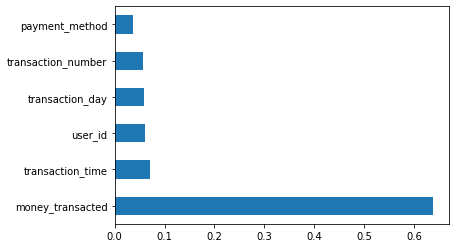

In [57]:
#plot the graph of feature importance
feat_importances = pd.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(6).plot(kind="barh")
plt.show()

In [286]:
#split the data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [287]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12483, 12)
(5351, 12)
(12483,)
(5351,)


## MOdel building with decision tree

In [79]:
clf = DecisionTreeClassifier(random_state=123) 

In [80]:
# Train Decision Tree Classifer
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=123)

In [81]:
y_pred_train = clf.predict(X_train)


In [82]:
y_pred = clf.predict(X_test)


In [83]:
f1_score(y_test, y_pred)

0.8705882352941177

In [140]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5307
           1       0.90      0.84      0.87        44

    accuracy                           1.00      5351
   macro avg       0.95      0.92      0.93      5351
weighted avg       1.00      1.00      1.00      5351



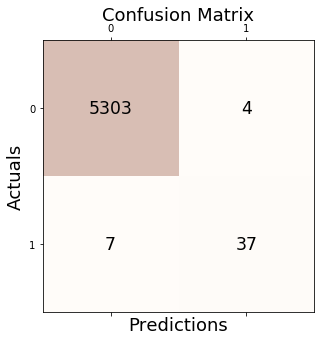

In [84]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [87]:
y_test.value_counts()

0    5307
1      44
Name: is_fraud, dtype: int64

# GridSearchCV

In [232]:
param_gridt = {"class_weight":['balanced', None],
              "criterion": ["gini", "entropy"],
              "max_depth": [3, 5, 6],
              "min_samples_leaf": [2, 5, 10],
               "max_leaf_nodes": [None, 5, 10, 20]
              }

In [234]:
dt = DecisionTreeClassifier(random_state=123)


In [235]:
clf_dt_grid = GridSearchCV(dt, param_gridt,cv=5)


In [236]:
clf_dt_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=123),
             param_grid={'class_weight': ['balanced', None],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 6],
                         'max_leaf_nodes': [None, 5, 10, 20],
                         'min_samples_leaf': [2, 5, 10]})

In [237]:
clf_dt_grid.best_params_

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': 6,
 'max_leaf_nodes': 10,
 'min_samples_leaf': 2}

In [240]:
y_test_predt = clf_dt_grid.best_estimator_.predict(X_test)

In [241]:
f1_score(y_test, y_test_predt)

0.8421052631578948

## Randomforest with GridSearchCV

In [142]:
rf = RandomForestClassifier(max_depth=8,class_weight = "balanced")

In [143]:
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=8)

In [144]:
y_predict_rf= rf.predict(X_test)

In [146]:
f1_score(y_test, y_predict_rf)

0.8478260869565218

# Hyper-parameter tuning using Grid Search and Cross Validation
# Parameters to test

In [147]:
param_grid = {"n_estimators" : [50, 100],
              "class_weight" : ['balanced', 'balanced_subsample'],
              "max_depth" : [5,7,10],
              "max_features" : [3, 5, 10],
              "min_samples_leaf" : [1, 2, 4]}

In [148]:
rf1 = RandomForestClassifier()

In [149]:
rf_grid = GridSearchCV(rf1, param_grid = param_grid, cv= 2)

In [150]:
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'max_depth': [5, 7, 10], 'max_features': [3, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [50, 100]})

In [151]:
rf_grid.best_params_

{'class_weight': 'balanced',
 'max_depth': 10,
 'max_features': 10,
 'min_samples_leaf': 2,
 'n_estimators': 100}

In [152]:
y_test_pred3 = rf_grid.best_estimator_.predict(X_test)

In [154]:
f1_score(y_test, y_test_pred3)

0.9176470588235294

# Gradient Boosting Algorithm

In [288]:
from xgboost import XGBClassifier

In [289]:
from sklearn.ensemble import GradientBoostingClassifier

In [303]:
xgb = XGBClassifier(max_depth = 8,eta=0.01)

In [304]:
xgb.fit(X_train, y_train)

[19:19:49] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.01, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.00999999978, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [305]:
y_test_predxg = xgb.predict(X_test)

In [306]:
f1_score(y_test, y_test_predxg)

0.8421052631578947

In [307]:
pd.DataFrame(y_test_predxg).value_counts()

0    5317
1      34
dtype: int64

In [312]:
param_grid1 = {"n_estimators" : [10, 100,200],
              "class_weight" : ['balanced', 'balanced_subsample'],
              "max_depth" : [5,7,10],
              "max_features" : [5, 7, 12],
              "min_samples_leaf" : [1, 2, 4]}

In [313]:
xgb1 = XGBClassifier()

In [314]:
xg_grid = GridSearchCV(xgb1, param_grid = param_grid1, cv= 2)

In [315]:
xg_grid.fit(X_train, y_train)

[19:20:46] WARNING: ../src/learner.cc:573: 
Parameters: { "class_weight", "max_features", "min_samples_leaf" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:20:46] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:20:46] WARNING: ../src/learner.cc:573: 
Parameters: { "class_weight", "max_features", "min_samples_leaf" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:20:4

GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [316]:
xg_grid.best_params_

{'class_weight': 'balanced',
 'max_depth': 5,
 'max_features': 5,
 'min_samples_leaf': 1,
 'n_estimators': 100}

In [317]:
y_test_predxg = xg_grid.best_estimator_.predict(X_test)

In [318]:
f1_score(y_test, y_test_predxg)

0.8395061728395062

In [319]:
print(classification_report(y_test, y_test_predxg))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5309
           1       0.87      0.81      0.84        42

    accuracy                           1.00      5351
   macro avg       0.94      0.90      0.92      5351
weighted avg       1.00      1.00      1.00      5351



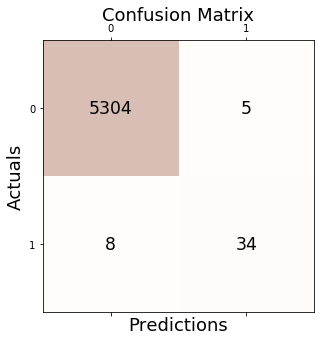

In [320]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_test_predxg)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [346]:
test_df = pd.read_csv("test_data.csv")

In [347]:
test_df["transaction_year"]=test_df["transaction_initiation"].apply(lambda x:np.int(x[0:4]))
test_df["transaction_month"]=test_df["transaction_initiation"].apply(lambda x:np.int(x[5:7]))
test_df["transaction_day"]=test_df["transaction_initiation"].apply(lambda x:np.int(x[8:10]))
test_df["transaction_time"]=test_df["transaction_initiation"].apply(lambda x:(x[11:19]))

In [348]:
test_df = test_df.drop(["country","transaction_initiation"],axis=1)

In [349]:
test_df["transaction_time"]=test_df["transaction_time"].apply(lambda x:get_sec(x))

In [350]:
test_df.head()

,transaction_number,user_id,payment_method,partner_id,partner_category,device_type,money_transacted,partner_pricing_category,transaction_year,transaction_month,transaction_day,transaction_time
0,857050141038272,3802500,visa_master_debit_cards,118335,cat_1,other_pcs,200.0,2,2016,12,28,53077
1,4400462872603,200704,e_wallet_payments,23667,cat_2,other_pcs,20.0,2,2016,12,14,64188
2,1207915598569499,25150225,sbi_atm_cum_debit_card,47334,cat_1,android_devices,-100.0,2,2017,1,21,37091
3,2009725616777536,21827584,visa_master_credit_cards,78890,cat_2,other_pcs,200.0,1,2017,1,16,48310
4,2319205210274863,576081,e_wallet_payments,23667,cat_2,other_pcs,100.0,2,2017,2,9,46048


In [344]:
test_df.shape

(19133, 13)

In [345]:
# Use `LabelEncoder` to encode labels with value between 0 and n_classes-1.
#partner_category
le = LabelEncoder()
test_df['partner_category'] = le.fit_transform(test_df['partner_category'])
#device_type
le = LabelEncoder()
test_df['device_type'] = le.fit_transform(test_df['device_type'])
#partner_pricing_category
le = LabelEncoder()
test_df['partner_pricing_category'] = le.fit_transform(test_df['partner_pricing_category'])
#payment_method
le = LabelEncoder()
test_df['payment_method'] = le.fit_transform(test_df['payment_method'])
#transaction_year
le = LabelEncoder()
test_df['transaction_year'] = le.fit_transform(test_df['transaction_year'])

In [341]:
##clf.predict(test_df)
test_df['is_fraud'] = pd.DataFrame(clf.predict(test_df))

In [342]:
test_df['is_fraud'] = pd.DataFrame(rf_grid.best_estimator_.predict(test_df))

ValueError: X has 13 features, but DecisionTreeClassifier is expecting 12 features as input.

In [343]:
test_df['is_fraud'] = pd.DataFrame( xg_grid.best_estimator_.predict(test_df))

ValueError: Feature shape mismatch, expected: 12, got 19133

In [277]:
Samplesubmission1 = pd.DataFrame()

In [279]:
Samplesubmission1["transaction_number"]=test_df['transaction_number']

In [280]:
Samplesubmission1["is_fraud"]=test_df['is_fraud']

In [281]:
Samplesubmission1.head()

,transaction_number,is_fraud
0,857050141038272,0
1,4400462872603,0
2,1207915598569499,0
3,2009725616777536,0
4,2319205210274863,0


In [282]:
Samplesubmission1.to_csv("Submission.csv",index=False)

In [284]:
Samplesubmission1.is_fraud.value_counts()

0    19082
1       51
Name: is_fraud, dtype: int64

In [173]:
SampleSubmission = pd.DataFrame()

In [174]:
SampleSubmission["transaction_number"]=test_df['transaction_number']

In [175]:
SampleSubmission["is_fraud"]=test_df['is_fraud']

In [176]:
SampleSubmission.head()

,transaction_number,is_fraud
0,857050141038272,0
1,4400462872603,0
2,1207915598569499,0
3,2009725616777536,0
4,2319205210274863,0


In [177]:
SampleSubmission.to_csv("Submission.csv",index=False)

In [178]:
SampleSubmission.is_fraud.value_counts()

0    19108
1       25
Name: is_fraud, dtype: int64

In [180]:
print(classification_report(y_test,y_test_pred3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5307
           1       0.95      0.89      0.92        44

    accuracy                           1.00      5351
   macro avg       0.98      0.94      0.96      5351
weighted avg       1.00      1.00      1.00      5351

